<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/Dhruvi-Kotecha/Data_Mining_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [306]:
data = pd.read_csv('/content/drive/MyDrive/Data_Mining_Datasets/the weather of 187 countries in 2020.csv')

<ipython-input-306-410f9189b744>:1: DtypeWarning:

Columns (16,17,18,19,23) have mixed types. Specify dtype option on import or set low_memory=False.



In [307]:
data.head()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The Feature Explanations:**

STATION: The station identifier

Country/Region: The country or region where the station is located

DATE: The date of the weather observation in YYYY-MM-DD format

Year: The year of the weather observation

Month: The month of the weather observation

Day: The day of the weather observation

PRCP: The amount of precipitation (rain or snow)

SNWD: The depth of snow on the ground

TAVG: The average temperature

TMAX: The maximum temperature

TMIN: The minimum temperature

SNOW: The amount of snowfall

LATITUDE: The latitude of the station's location

LONGITUDE: The longitude of the station's location

ELEVATION: The elevation of the station's location

PRCP_ATTRIBUTES: Additional attributes for the precipitation data

TAVG_ATTRIBUTES: Additional attributes for the average temperature data

TMAX_ATTRIBUTES: Additional attributes for the maximum temperature data

TMIN_ATTRIBUTES: Additional attributes for the minimum temperature data

DAPR: The number of days since the last precipitation of any amount

MDPR: The multiday precipitation total

WESD: The water equivalent of the snow depth on the ground

SNWD_ATTRIBUTES: Additional attributes for the snow depth data

In [308]:
data.shape

(1392575, 23)

In [309]:
data.dtypes

STATION             object
Country/Region      object
DATE                object
Year                 int64
Month                int64
Day                  int64
PRCP               float64
SNWD               float64
TAVG               float64
TMAX               float64
TMIN               float64
SNOW               float64
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
PRCP_ATTRIBUTES     object
TAVG_ATTRIBUTES     object
TMAX_ATTRIBUTES     object
TMIN_ATTRIBUTES     object
DAPR               float64
MDPR               float64
WESD               float64
SNWD_ATTRIBUTES     object
dtype: object

In [310]:
data.describe()

,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,WESD
count,1392575.0,1.392575e+06,1.392575e+06,1.043369e+06,377429.000000,878632.000000,866705.000000,898381.000000,105392.000000,104742.000000,104742.000000,104742.000000,1293.000000,81.000000,2.000000
mean,2020.0,4.279517e+00,1.595168e+01,2.564688e+00,120.712848,14.814992,17.412551,7.093554,3.742760,37.689351,71.371220,787.542437,5.292343,0.958025,0.050000
std,0.0,1.812637e+00,8.770296e+00,8.035237e+00,293.874318,13.063075,12.707588,12.227766,19.093372,11.572761,71.760255,1094.757321,7.121322,1.653137,0.070711
min,2020.0,1.000000e+00,1.000000e+00,0.000000e+00,-20.000000,-56.200000,-55.000000,-65.000000,0.000000,-17.817000,-140.850000,0.600000,1.000000,0.000000,0.000000
25%,2020.0,3.000000e+00,8.000000e+00,0.000000e+00,0.000000,6.700000,8.400000,0.000000,0.000000,30.667000,75.983000,68.000000,2.000000,0.000000,0.025000
50%,2020.0,4.000000e+00,1.600000e+01,0.000000e+00,0.000000,16.800000,18.500000,7.700000,0.000000,37.850000,104.500000,250.000000,3.000000,0.280000,0.050000
75%,2020.0,6.000000e+00,2.400000e+01,1.500000e+00,99.000000,25.600000,27.222222,15.600000,0.000000,45.217000,116.117000,1099.000000,5.000000,1.510000,0.075000
max,2020.0,7.000000e+00,3.100000e+01,4.849000e+02,52900.000000,43.300000,51.200000,36.700000,625.000000,82.500000,131.983000,4701.000000,61.000000,9.240000,0.100000


In [311]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

In [312]:
data.duplicated().sum()

22456

In [313]:
data = data.drop_duplicates()

In [314]:
data.shape

(1370119, 23)

In [315]:
data.isnull().sum()

STATION                  0
Country/Region           0
DATE                     0
Year                     0
Month                    0
Day                      0
PRCP                346830
SNWD                992692
TAVG                513943
TMAX                517620
TMIN                485944
SNOW               1264727
LATITUDE           1265377
LONGITUDE          1265377
ELEVATION          1265377
PRCP_ATTRIBUTES    1364112
TAVG_ATTRIBUTES    1366269
TMAX_ATTRIBUTES    1364482
TMIN_ATTRIBUTES    1364245
DAPR               1368826
MDPR               1370038
WESD               1370117
SNWD_ATTRIBUTES    1369765
dtype: int64

In [316]:
# calculating the percentage of missig values
missing_percentage = (data.isnull().sum() / len(data)) * 100

In [317]:
print(missing_percentage)

STATION             0.000000
Country/Region      0.000000
DATE                0.000000
Year                0.000000
Month               0.000000
Day                 0.000000
PRCP               25.313860
SNWD               72.452977
TAVG               37.510829
TMAX               37.779200
TMIN               35.467284
SNOW               92.307821
LATITUDE           92.355263
LONGITUDE          92.355263
ELEVATION          92.355263
PRCP_ATTRIBUTES    99.561571
TAVG_ATTRIBUTES    99.719003
TMAX_ATTRIBUTES    99.588576
TMIN_ATTRIBUTES    99.571278
DAPR               99.905629
MDPR               99.994088
WESD               99.999854
SNWD_ATTRIBUTES    99.974163
dtype: float64


In [318]:
limit = len(data) * 0.9
limit

1233107.1

In [319]:
# Get a list of columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90].index.tolist()

# Drop the columns
data = data.drop(columns=columns_to_drop)

In [320]:
data.columns

Index(['STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day', 'PRCP',
       'SNWD', 'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370119 entries, 0 to 1392574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   STATION         1370119 non-null  object        
 1   Country/Region  1370119 non-null  object        
 2   DATE            1370119 non-null  datetime64[ns]
 3   Year            1370119 non-null  int64         
 4   Month           1370119 non-null  int64         
 5   Day             1370119 non-null  int64         
 6   PRCP            1023289 non-null  float64       
 7   SNWD            377427 non-null   float64       
 8   TAVG            856176 non-null   float64       
 9   TMAX            852499 non-null   float64       
 10  TMIN            884175 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 125.4+ MB


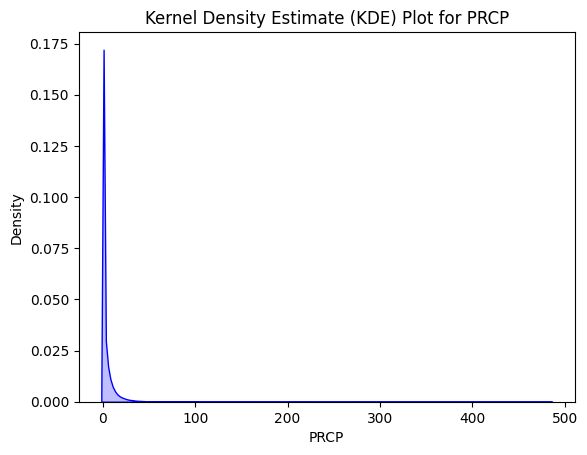

In [322]:
# Create a KDE plot for the 'PRCP' column before filling null values
sns.kdeplot(data['PRCP'], fill=True, color='blue')

# Add labels and title
plt.xlabel('PRCP')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot for PRCP')

# Display the plot
plt.show()

In [323]:
print('Mean of PRCP :', round(data['PRCP'].mean(), 3))
print('Standard Deviation of PRCP :', round(data['PRCP'].std(), 3))

Mean of PRCP : 2.585
Standard Deviation of PRCP : 8.025


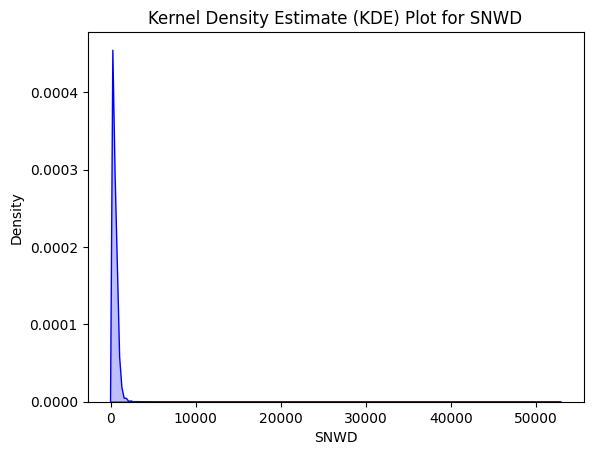

In [324]:
# Create a KDE plot for the 'SNWD' column
sns.kdeplot(data['SNWD'], fill=True, color='blue')

# Add labels and title
plt.xlabel('SNWD')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot for SNWD')

# Display the plot
plt.show()

In [325]:
print('Mean of SNWD :', round(data['SNWD'].mean(), 3))
print('Standard Deviation of SNWD :', round(data['SNWD'].std(), 3))

Mean of SNWD : 120.713
Standard Deviation of SNWD : 293.875


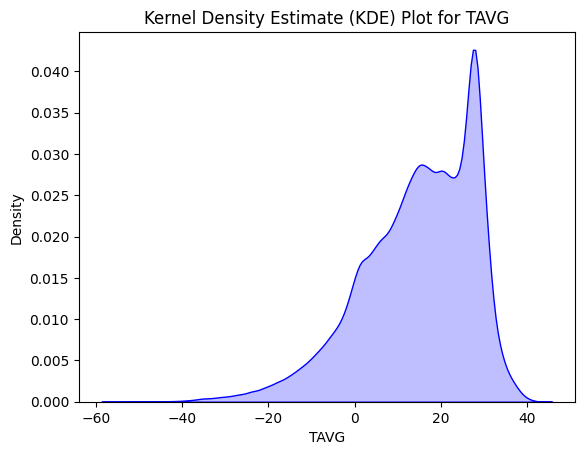

In [326]:
# Create a KDE plot for the 'TAVG' column
sns.kdeplot(data['TAVG'], fill=True, color='blue')

# Add labels and title
plt.xlabel('TAVG')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot for TAVG')

# Display the plot
plt.show()

In [327]:
print('Mean of TAVG :', round(data['TAVG'].mean(), 3))
print('Standard Deviation of TAVG :', round(data['TAVG'].std(), 3))

Mean of TAVG : 14.573
Standard Deviation of TAVG : 13.116


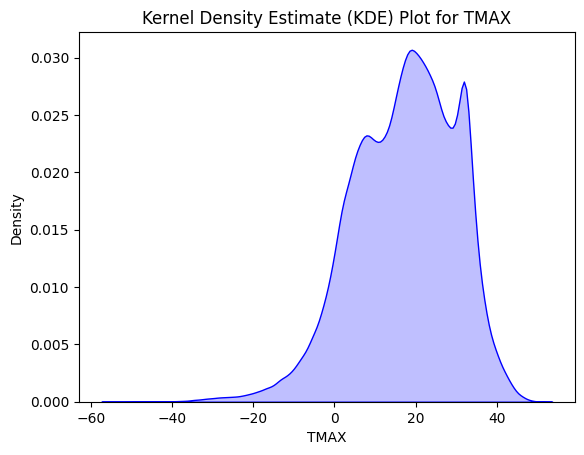

In [328]:
# Create a KDE plot for the 'TMAX' column
sns.kdeplot(data['TMAX'], fill=True, color='blue')

# Add labels and title
plt.xlabel('TMAX')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot for TMAX')

# Display the plot
plt.show()

In [329]:
print('Mean of TMAX :', round(data['TMAX'].mean(), 3))
print('Standard Deviation of TMAX :', round(data['TMAX'].std(), 3))

Mean of TMAX : 17.172
Standard Deviation of TMAX : 12.656


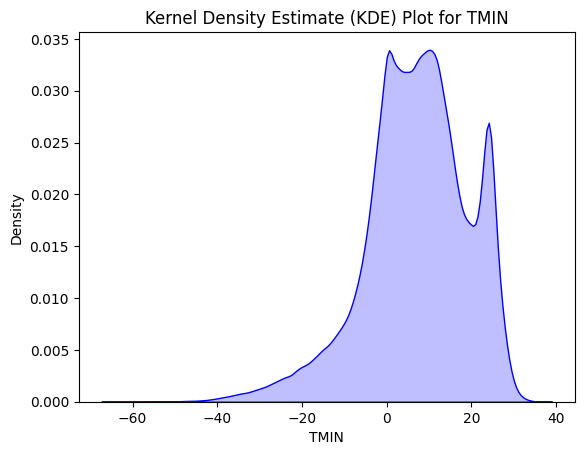

In [330]:
# Create a KDE plot for the 'TMIN' column
sns.kdeplot(data['TMIN'], fill=True, color='blue')

# Add labels and title
plt.xlabel('TMIN')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot for TMIN')

# Display the plot
plt.show()

In [331]:
print('Mean of TMIN :', round(data['TMIN'].mean(), 3))
print('Standard Deviation of TMIN :', round(data['TMIN'].std(), 3))

Mean of TMIN : 6.948
Standard Deviation of TMIN : 12.245


# Correlation Analysis

In [332]:
corr_matrix = data.corr(numeric_only='int')
corr_matrix

,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.150757,0.054312,-0.241610,0.427135,0.511390,0.452919
Day,NaN,-0.150757,1.000000,-0.015601,-0.017893,0.007777,0.013443,0.012645
PRCP,NaN,0.054312,-0.015601,1.000000,-0.018828,0.119098,0.061686,0.155441
SNWD,NaN,-0.241610,-0.017893,-0.018828,1.000000,-0.369569,-0.365118,-0.418693
TAVG,NaN,0.427135,0.007777,0.119098,-0.369569,1.000000,0.981784,0.976616
TMAX,NaN,0.511390,0.013443,0.061686,-0.365118,0.981784,1.000000,0.917586
TMIN,NaN,0.452919,0.012645,0.155441,-0.418693,0.976616,0.917586,1.000000


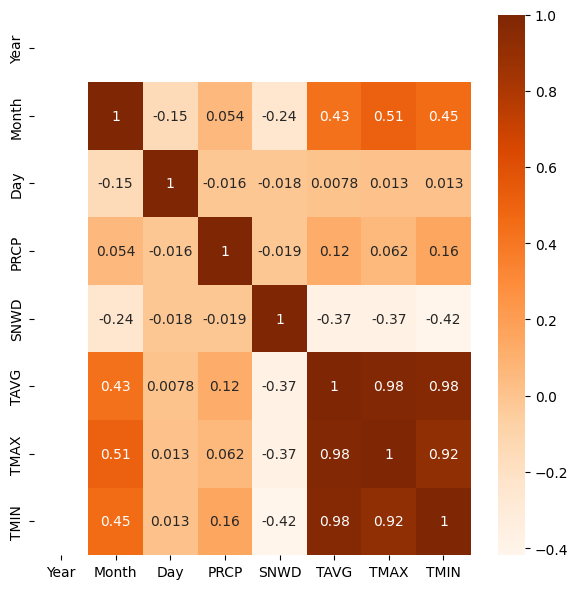

In [333]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges');
plt.tight_layout()

In [334]:
# Count records for each country
country_counts = data['Country/Region'].value_counts()

# Sort by count in descending order
country_counts_sorted = country_counts.sort_values(ascending=False)

# Print the sorted counts
print(country_counts_sorted)

Canada          254817
Sweden          111499
Germany         103931
Russia           91988
Netherlands      64137
                 ...  
Zimbabwe           166
Sierra Leone       101
Iraq               100
Malawi              74
Zambia              13
Name: Country/Region, Length: 187, dtype: int64


# India

In [335]:
india_data = data[data['Country/Region'] == 'India']

In [336]:
india_data.shape

(23007, 11)

In [337]:
india_data.isnull().sum()

STATION               0
Country/Region        0
DATE                  0
Year                  0
Month                 0
Day                   0
PRCP              15145
SNWD              23007
TAVG                  0
TMAX              13111
TMIN               4037
dtype: int64

In [338]:
# calculating the percentage of missig values
missing_percentage = (india_data.isnull().sum() / len(india_data)) * 100

In [339]:
print(missing_percentage)

STATION             0.000000
Country/Region      0.000000
DATE                0.000000
Year                0.000000
Month               0.000000
Day                 0.000000
PRCP               65.827792
SNWD              100.000000
TAVG                0.000000
TMAX               56.987004
TMIN               17.546834
dtype: float64


# United States

In [340]:
us_data = data[data['Country/Region'] == 'US']

In [341]:
us_data.shape

(8575, 11)

In [342]:
us_data.isnull().sum()

STATION              0
Country/Region       0
DATE                 0
Year                 0
Month                0
Day                  0
PRCP               364
SNWD              3807
TAVG               743
TMAX               737
TMIN               738
dtype: int64

In [343]:
# calculating the percentage of missig values
missing_percentage = (us_data.isnull().sum() / len(us_data)) * 100

In [344]:
print(missing_percentage)

STATION            0.000000
Country/Region     0.000000
DATE               0.000000
Year               0.000000
Month              0.000000
Day                0.000000
PRCP               4.244898
SNWD              44.396501
TAVG               8.664723
TMAX               8.594752
TMIN               8.606414
dtype: float64


In [345]:
# Drop rows with null values in both 'TMIN' and 'TMAX' columns
us_data = us_data.dropna(subset=['TMIN', 'TMAX'])

In [346]:
# Fill null values in 'TAVG' with the average of 'TMIN' and 'TMAX'
us_data['TAVG'].fillna((us_data['TMIN'] + us_data['TMAX']) / 2, inplace=True)

<ipython-input-346-d24b462ef407>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [347]:
# Drop rows where 'PRCP' is null
us_data = us_data.dropna(subset=['PRCP'])

In [348]:
us_data.isnull().sum()

STATION              0
Country/Region       0
DATE                 0
Year                 0
Month                0
Day                  0
PRCP                 0
SNWD              3609
TAVG                 0
TMAX                 0
TMIN                 0
dtype: int64

In [349]:
print('Starting month :', us_data['Month'].min())
print('Ending month :', us_data['Month'].max())

Starting month : 1
Ending month : 7


In [350]:
india_copy = india_data.copy()
india_copy.set_index('DATE', inplace=True)
india_seasonal = india_copy.resample('M').mean(numeric_only=True)[['TAVG', 'TMAX', 'TMIN']]
india_seasonal_df = pd.DataFrame(india_seasonal)
px.histogram(india_seasonal_df,
             x=india_seasonal_df.index, y='TAVG',
             color='TAVG',
             nbins=7,
             title='The sum of TAVG Monthly of India')

# Canada

In [351]:
canada_data = data[data['Country/Region'] == 'Canada']

In [352]:
canada_data.shape

(254817, 11)

In [353]:
canada_data.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP               27215
SNWD              160065
TAVG              100701
TMAX               91466
TMIN               91542
dtype: int64

In [354]:
# calculating the percentage of missig values
missing_percentage = (canada_data.isnull().sum() / len(canada_data)) * 100

In [355]:
print(missing_percentage)

STATION            0.000000
Country/Region     0.000000
DATE               0.000000
Year               0.000000
Month              0.000000
Day                0.000000
PRCP              10.680214
SNWD              62.815668
TAVG              39.518949
TMAX              35.894779
TMIN              35.924605
dtype: float64


In [356]:
# Drop rows with null values in both 'TMIN' and 'TMAX' columns
canada_data = canada_data.dropna(subset=['TMIN', 'TMAX'])

In [357]:
# Fill null values in 'TAVG' with the average of 'TMIN' and 'TMAX'
canada_data['TAVG'].fillna((canada_data['TMIN'] + canada_data['TMAX']) / 2, inplace=True)

In [358]:
# Drop rows where 'PRCP' is null
canada_data = canada_data.dropna(subset=['PRCP'])

In [359]:
canada_data.isnull().sum()

STATION               0
Country/Region        0
DATE                  0
Year                  0
Month                 0
Day                   0
PRCP                  0
SNWD              74418
TAVG                  0
TMAX                  0
TMIN                  0
dtype: int64

In [360]:
print('Starting month :', canada_data['Month'].min())
print('Ending month :', canada_data['Month'].max())

Starting month : 1
Ending month : 7


In [361]:
canada_copy = canada_data.copy()
canada_copy.set_index('DATE', inplace=True)
canada_seasonal = canada_copy.resample('M').mean(numeric_only=True)[['TAVG', 'TMAX', 'TMIN']]
canada_seasonal_df = pd.DataFrame(canada_seasonal)
px.histogram(canada_seasonal_df,
             x=canada_seasonal_df.index, y='TAVG',
             color='TAVG',
             nbins=7,
             title='The sum of TAVG Monthly of Canada')

# Sweden

In [362]:
sweden_data = data[data['Country/Region'] == 'Sweden']

In [363]:
sweden_data.shape

(111499, 11)

In [364]:
sweden_data.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP                5429
SNWD               44715
TAVG              109809
TMAX               71009
TMIN               71094
dtype: int64

In [365]:
# calculating the percentage of missig values
missing_percentage = (sweden_data.isnull().sum() / len(sweden_data)) * 100

In [366]:
print(missing_percentage)

STATION            0.000000
Country/Region     0.000000
DATE               0.000000
Year               0.000000
Month              0.000000
Day                0.000000
PRCP               4.869102
SNWD              40.103499
TAVG              98.484291
TMAX              63.685773
TMIN              63.762007
dtype: float64


In [367]:
# Drop rows with null values in both 'TMIN' and 'TMAX' columns
sweden_data = sweden_data.dropna(subset=['TMIN', 'TMAX'])

In [368]:
# Fill null values in 'TAVG' with the average of 'TMIN' and 'TMAX'
sweden_data['TAVG'].fillna((sweden_data['TMIN'] + sweden_data['TMAX']) / 2, inplace=True)

In [369]:
# Drop rows where 'PRCP' is null
sweden_data = sweden_data.dropna(subset=['PRCP'])

In [370]:
sweden_data.isnull().sum()

STATION               0
Country/Region        0
DATE                  0
Year                  0
Month                 0
Day                   0
PRCP                  0
SNWD              22720
TAVG                  0
TMAX                  0
TMIN                  0
dtype: int64

In [371]:
print('Starting month :', sweden_data['Month'].min())
print('Ending month :', sweden_data['Month'].max())

Starting month : 1
Ending month : 7


In [372]:
sweden_copy = sweden_data.copy()
sweden_copy.set_index('DATE', inplace=True)
sweden_seasonal = sweden_copy.resample('M').mean(numeric_only=True)[['TAVG', 'TMAX', 'TMIN']]
sweden_seasonal_df = pd.DataFrame(sweden_seasonal)
px.histogram(sweden_seasonal_df,
             x=sweden_seasonal_df.index, y='TAVG',
             color='TAVG',
             nbins=7,
             title='The sum of TAVG Monthly of Sweden')

# Germany

In [373]:
germany_data = data[data['Country/Region'] == 'Germany']

In [374]:
germany_data.shape

(103931, 11)

In [375]:
germany_data.isnull().sum()

STATION               0
Country/Region        0
DATE                  0
Year                  0
Month                 0
Day                   0
PRCP               2170
SNWD              45194
TAVG              99572
TMAX              20279
TMIN              20278
dtype: int64

In [376]:
# calculating the percentage of missig values
missing_percentage = (germany_data.isnull().sum() / len(germany_data)) * 100

In [377]:
print(missing_percentage)

STATION            0.000000
Country/Region     0.000000
DATE               0.000000
Year               0.000000
Month              0.000000
Day                0.000000
PRCP               2.087924
SNWD              43.484620
TAVG              95.805871
TMAX              19.511984
TMIN              19.511022
dtype: float64


In [378]:
# Drop rows with null values in both 'TMIN' and 'TMAX' columns
germany_data = germany_data.dropna(subset=['TMIN', 'TMAX'])

In [379]:
# Fill null values in 'TAVG' with the average of 'TMIN' and 'TMAX'
germany_data['TAVG'].fillna((germany_data['TMIN'] + germany_data['TMAX']) / 2, inplace=True)

<ipython-input-379-5b9e64570384>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [380]:
# Drop rows where 'PRCP' is null
germany_data = germany_data.dropna(subset=['PRCP'])

In [381]:
germany_data.isnull().sum()

STATION               0
Country/Region        0
DATE                  0
Year                  0
Month                 0
Day                   0
PRCP                  0
SNWD              39723
TAVG                  0
TMAX                  0
TMIN                  0
dtype: int64

In [382]:
print('Starting month :', germany_data['Month'].min())
print('Ending month :', germany_data['Month'].max())

Starting month : 1
Ending month : 7


In [383]:
germany_copy = germany_data.copy()
germany_copy.set_index('DATE', inplace=True)
germany_seasonal = germany_copy.resample('M').mean(numeric_only=True)[['TAVG', 'TMAX', 'TMIN']]
germany_seasonal_df = pd.DataFrame(germany_seasonal)
px.histogram(germany_seasonal_df,
             x=germany_seasonal_df.index, y='TAVG',
             color='TAVG',
             nbins=7,
             title='The sum of TAVG Monthly of Germany')

# Russia

In [384]:
russia_data = data[data['Country/Region'] == 'Russia']

In [385]:
russia_data.shape

(91988, 11)

In [386]:
russia_data.isnull().sum()

STATION               0
Country/Region        0
DATE                  0
Year                  0
Month                 0
Day                   0
PRCP              11941
SNWD              54924
TAVG                  0
TMAX              17447
TMIN              29994
dtype: int64

In [387]:
# calculating the percentage of missig values
missing_percentage = (russia_data.isnull().sum() / len(russia_data)) * 100

In [388]:
print(missing_percentage)

STATION            0.000000
Country/Region     0.000000
DATE               0.000000
Year               0.000000
Month              0.000000
Day                0.000000
PRCP              12.981041
SNWD              59.707788
TAVG               0.000000
TMAX              18.966604
TMIN              32.606427
dtype: float64


In [389]:
# Drop rows with null values in both 'TMIN' and 'TMAX' columns
russia_data = russia_data.dropna(subset=['TMIN', 'TMAX'])

In [390]:
# Fill null values in 'TAVG' with the average of 'TMIN' and 'TMAX'
russia_data['TAVG'].fillna((russia_data['TMIN'] + russia_data['TMAX']) / 2, inplace=True)

In [391]:
# Drop rows where 'PRCP' is null
russia_data = russia_data.dropna(subset=['PRCP'])

In [392]:
russia_data.isnull().sum()

STATION               0
Country/Region        0
DATE                  0
Year                  0
Month                 0
Day                   0
PRCP                  0
SNWD              31186
TAVG                  0
TMAX                  0
TMIN                  0
dtype: int64

In [393]:
print('Starting month :', russia_data['Month'].min())
print('Ending month :', russia_data['Month'].max())

Starting month : 1
Ending month : 7


In [394]:
russia_copy = russia_data.copy()
russia_copy.set_index('DATE', inplace=True)
russia_seasonal = russia_copy.resample('M').mean(numeric_only=True)[['TAVG', 'TMAX', 'TMIN']]
russia_seasonal_df = pd.DataFrame(russia_seasonal)
px.histogram(russia_seasonal_df,
             x=russia_seasonal_df.index, y='TAVG',
             color='TAVG',
             nbins=7,
             title='The sum of TAVG Monthly of Russia')

# Netherlands

In [395]:
netherland_data = data[data['Country/Region'] == 'Netherlands']

In [396]:
netherland_data.shape

(64137, 11)

In [397]:
netherland_data.isnull().sum()

STATION               0
Country/Region        0
DATE                  0
Year                  0
Month                 0
Day                   0
PRCP                978
SNWD               6926
TAVG              63197
TMAX              58149
TMIN              58045
dtype: int64

In [398]:
# calculating the percentage of missig values
missing_percentage = (netherland_data.isnull().sum() / len(netherland_data)) * 100

In [399]:
print(missing_percentage)

STATION            0.000000
Country/Region     0.000000
DATE               0.000000
Year               0.000000
Month              0.000000
Day                0.000000
PRCP               1.524861
SNWD              10.798759
TAVG              98.534387
TMAX              90.663735
TMIN              90.501583
dtype: float64


In [400]:
# Drop rows with null values in both 'TMIN' and 'TMAX' columns
netherland_data = netherland_data.dropna(subset=['TMIN', 'TMAX'])

In [401]:
# Fill null values in 'TAVG' with the average of 'TMIN' and 'TMAX'
netherland_data['TAVG'].fillna((netherland_data['TMIN'] + netherland_data['TMAX']) / 2, inplace=True)

<ipython-input-401-a01dd7d0cd1c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [402]:
# Drop rows where 'PRCP' is null
netherland_data = netherland_data.dropna(subset=['PRCP'])

In [403]:
netherland_data.isnull().sum()

STATION              0
Country/Region       0
DATE                 0
Year                 0
Month                0
Day                  0
PRCP                 0
SNWD              5199
TAVG                 0
TMAX                 0
TMIN                 0
dtype: int64

In [404]:
print('Starting month :', netherland_data['Month'].min())
print('Ending month :', netherland_data['Month'].max())

Starting month : 1
Ending month : 7


In [405]:
netherland_copy = netherland_data.copy()
netherland_copy.set_index('DATE', inplace=True)
netherland_seasonal = netherland_copy.resample('M').mean(numeric_only=True)[['TAVG', 'TMAX', 'TMIN']]
netherland_seasonal_df = pd.DataFrame(netherland_seasonal)
px.histogram(netherland_seasonal_df,
             x=netherland_seasonal_df.index, y='TAVG',
             color='TAVG',
             nbins=7,
             title='The sum of TAVG Monthly of Netherlands')

# Concat all the dataframes
## Dataset is made from data of 6 countries - US, Canada, Sweden, Germany, Russia, Netherland

In [406]:
data1 = pd.concat([us_data, canada_data, sweden_data, germany_data, russia_data, netherland_data], axis=0).reset_index()

In [407]:
data1.head()

,index,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN
0,20113,USW00023055,US,2020-01-22,2020,1,22,0.0,NaN,7.50,12.8,2.2
1,20114,USW00023055,US,2020-01-23,2020,1,23,0.0,NaN,7.25,12.8,1.7
2,20115,USW00023055,US,2020-01-24,2020,1,24,0.0,NaN,8.85,14.4,3.3
3,20116,USW00023055,US,2020-01-25,2020,1,25,0.0,NaN,9.70,16.1,3.3
4,20117,USW00023055,US,2020-01-26,2020,1,26,0.0,NaN,9.20,15.6,2.8


In [408]:
data1.shape

(322213, 12)

In [409]:
data1.isnull().sum()

index                  0
STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP                   0
SNWD              176855
TAVG                   0
TMAX                   0
TMIN                   0
dtype: int64

In [410]:
# calculating the percentage of missig values
missing_percentage = (data1.isnull().sum() / len(data1)) * 100

In [411]:
print(missing_percentage)

index              0.000000
STATION            0.000000
Country/Region     0.000000
DATE               0.000000
Year               0.000000
Month              0.000000
Day                0.000000
PRCP               0.000000
SNWD              54.887605
TAVG               0.000000
TMAX               0.000000
TMIN               0.000000
dtype: float64


In [412]:
# Drop the 'index' column
data1 = data1.drop(columns=['index'])

# Drop the 'DATE' column
data1 = data1.drop(columns=['DATE'])

# Drop the 'STATION' column
data1 = data1.drop(columns=['STATION'])

# Drop the 'SNWD' column
data1 = data1.drop(columns=['SNWD'])

In [413]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Country/Region' column
data1['Country/Region'] = le.fit_transform(data1['Country/Region'])

In [414]:
data1['Country/Region'].unique()

array([5, 0, 4, 1, 3, 2])

# Linear Regression by splitting the data according to months - first 5 months data in train set and next 2 months data in test set

In [415]:
# Create a Month-Year column
data1['Month-Year'] = pd.to_datetime(data1['Year'].astype(str) + '-' + data1['Month'].astype(str), format='%Y-%m')

# Sort data by 'Country/Region' and 'Month-Year'
data1.sort_values(by=['Country/Region', 'Month-Year'], inplace=True)

# Group data by 'Country/Region'
grouped = data1.groupby('Country/Region')

# Define a function to split data
def split_data(group):
    return group.iloc[:5], group.iloc[5:7]

# Apply the function and concatenate results
train_data, test_data = zip(*grouped.apply(split_data))
train_df = pd.concat(train_data)
test_df = pd.concat(test_data)

# Drop the Month-Year column (if not needed)
train_df = train_df.drop(columns=['Month-Year'])
test_df = test_df.drop(columns=['Month-Year'])
train_df = train_df.drop(columns=['Year'])
test_df = test_df.drop(columns=['Year'])

# Separate features (X) and target (y)
X_train = train_df.drop(columns=['PRCP'])
y_train = train_df['PRCP']
X_test = test_df.drop(columns=['PRCP'])
y_test = test_df['PRCP']

In [416]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [417]:
# Create a StandardScaler instance
# scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [418]:
# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nCoefficients: {model.coef_}")
print(f"\nIntercept: {model.intercept_}")
print(f"\nMean Squared Error: {mse}")
print(f"\nRoot Mean Squared Error: {rmse}")
print(f"\nR-squared (R2) Score: {r2}")


Coefficients: [-2.60663987e-02 -2.03559392e-13  2.68483834e+00  2.34809722e+01
 -1.44157970e+01 -1.08663673e+01]

Intercept: 0.8161265303865365

Mean Squared Error: 6.294275942511245

Root Mean Squared Error: 2.5088395609347454

R-squared (R2) Score: -0.03710250668987847


# Optimize using Stocastic Gradient Descent

In [419]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SGDRegressor model
model = SGDRegressor(loss='squared_error', max_iter=100, tol=1e-3, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nCoefficients (Weights): {model.coef_}")
print(f"\nIntercept (Bias): {model.intercept_}")
print(f"\nMean Squared Error (RMSE): {mse}")
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")
print(f"\nR-squared (R2) Score: {r2}")


Coefficients (Weights): [ 0.16292206  0.          0.85587752 -0.05963367 -0.31957554 -0.14499392]

Intercept (Bias): [0.58917955]

Mean Squared Error (RMSE): 7.742969324204206

Root Mean Squared Error (RMSE): 2.782619148249398

R-squared (R2) Score: -0.27580248605229785


# Polynomial Regression

In [420]:
degree = 2  # Change this to the desired degree

poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)

X_test_poly = poly.transform(X_test_scaled)
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Squared Error: {mse}")
print(f"\nR-squared (R2) Score: {r2}")
print(f"\nRoot Mean Squared Error: {rmse}")


Mean Squared Error: 23.520700492717626

R-squared (R2) Score: -2.875485864124193

Root Mean Squared Error: 4.849814480237118


# Prediction using random split

In [421]:
data1 = pd.concat([us_data, canada_data, sweden_data, germany_data, russia_data, netherland_data], axis=0).reset_index()

In [422]:
data1.columns

Index(['index', 'STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day',
       'PRCP', 'SNWD', 'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [423]:
# Drop the 'index' column
data1 = data1.drop(columns=['index'])

# Drop the 'STATION' column
data1 = data1.drop(columns=['STATION'])

# Drop the 'DATE' column
data1 = data1.drop(columns=['DATE'])

# Drop the 'Year' column
data1 = data1.drop(columns=['Year'])

# Drop the 'SNWD' column
data1 = data1.drop(columns=['SNWD'])

In [424]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Country/Region' column
data1['Country/Region'] = le.fit_transform(data1['Country/Region'])

In [425]:
data1.columns

Index(['Country/Region', 'Month', 'Day', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [426]:
# Separate features (X) and target (y)
X = data1.drop(columns=['PRCP'])
y = data1['PRCP']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (257770, 6)
X_test shape: (64443, 6)
y_train shape: (257770,)
y_test shape: (64443,)


In [427]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"\nIntercept: {model.intercept_}")
print(f"\nMean Squared Error: {mse}")
print(f"\nRoot Mean Squared Error: {rmse}")
print(f"\nR-squared (R2) Score: {r2}")

Coefficients: [-0.13499172 -0.04367244 -0.01374715 -0.13212329 -0.13318693  0.33019795]

Intercept: 4.5608580726455905

Mean Squared Error: 23.287915498728356

Root Mean Squared Error: 4.825755432958487

R-squared (R2) Score: -2.875485864124193
